In [1]:
# imports here
from snowexsql.db import get_db
from snowexsql.data import SiteData, ImageData, LayerData, PointData
from snowexsql.conversions import query_to_geopandas
import datetime

### Distinguish pits by vegetation coverage: 
- treeless (0% tree cover)
- sparse (1-30% tree cover)
- dense (31-100% tree cover)

*vegetation classes assigned based on optical imagery: tree density map, Nov. 2010 WorldView-2 Imagery

In [4]:
def parse_veg_class(site_id):
    # Classifying by vegetation coverage 
    veg_class = {'treeless':[1, 3], 'sparse':[4, 6], 'dense':[7, 9]}
   
    vclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric():
        class_id = int(class_id)

        for k,v in veg_class.items():

            if class_id >= v[0] and class_id <= v[1]:
                vclass = k 
                break

    return vclass 

### Distinguish pits by snow depth classes: 
- shallow
- medium
- deep

*depth classes assigned based on 2017 snow depth lidar data

In [13]:
def parse_depth_class(site_id):
    # Classifying by expected depth 
    depth_class = {'shallow':[1, 4, 7], 'medium':[2, 5, 8], 'deep':[3, 6, 9]} #[1:3:9]
   
    dclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric(): #for the outlier TS site
        class_id = int(class_id) #cast as integer

        for k,v in depth_class.items(): #for the key, value pairs in the dict listed above:

            if class_id = v[0]:# or v[1] or v[2]:
                dclass = k 
                break

    return dclass 




SyntaxError: invalid syntax (<ipython-input-13-c2ef875665a5>, line 14)

In [22]:
site_id = '5N34'
dclass = None 
class_id = site_id[0]

# (k for k,v in dict.iteritems() if v == value)

for k,v in depth_class.items():
    (k for k,v in class_id)
    print(k)
#     print('v:', v)
# #     if class_id = v
# #     dclass = k
# #     print(dclass)
# print(class_id)

shallow
medium
deep


[('sample_signal',), ('grain_size',), ('density',), ('reflectance',), ('permittivity',), ('lwc_vol',), ('manual_wetness',), ('equivalent_diameter',), ('specific_surface_area',), ('grain_type',), ('temperature',), ('hand_hardness',)]


<AxesSubplot:>

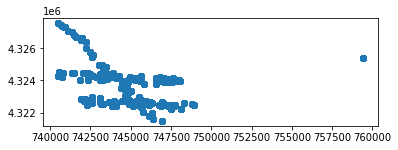

In [3]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

result = session.query(LayerData.type).distinct().all()
print(result)

qry = session.query(LayerData).filter(LayerData.type=='density')

# Form our dataframe from the query 
df = query_to_geopandas(qry, engine)

# Form a handy lambda for performant ops in df's
veg_class_lambda = lambda row: parse_veg_class(row['site_id'])
df['veg_class'] = df.apply(veg_class_lambda, axis=1)

# Show off our df 
df.plot()


PLOT: #1 Density

  - depth (cm) vs. density (kg/m3) for snow depth classes
  - 3 colors: shallow (r), medium (g), deep (b)
  - vertical bars to show the 10cm measurement increments (see ../images)  
  - time period -- (hmm, all? single day? 1 week avg?)

PLOT: #2 Temperature

  - depth (cm) vs. temperature (C) for snow depth classes
  - 3 colors: shallow (r), medium (g), deep (b)
  - x-axis is -10 to 0 (see ../images)  
  - time period -- (hmm, all? single day? 1 week avg?)
  - could plot all pits with light gray line (or group by depth classes in a light/transparent color) and then take the avg. of 'shallow', 'medium', 'deep' and plot with a bold color line

PLOT: #3
  - do something with stratigraphy here....still thinking on that...